# Assignment 1: Image Filtering and Edge Detection
### Samantha Handal - 260983914

# 1 - Image Acquisition
Using a cellphone camera or a standalone digital camera, capture two images of a household object, where each image of the object is taken from a different viewpoint. These images can be of any size.

Mounted at /content/drive


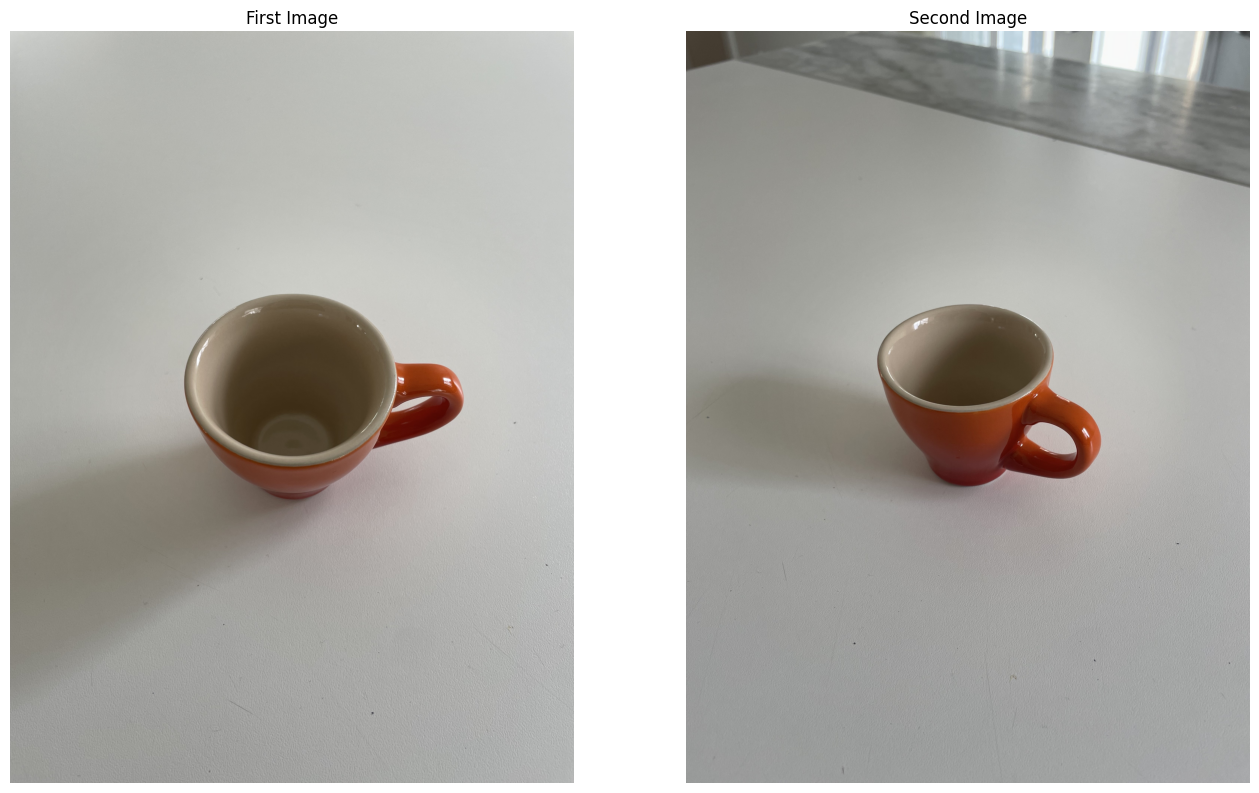

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# path variable to my image library
path = '/content/drive/My Drive/ECSE415/Assignment_1/images/'

# load image - from tutorial 2
image_path = path + "Cup_1.jpg"
img1 = cv2.imread(image_path)

image_path = path + "Cup_2.jpg"
img2 = cv2.imread(image_path)

# plot two images side by side
# since OpenCV loads images in BGR format, convert to RGB for correct color display
plt.figure(figsize=(16, 12))

# Plot the first image, (1 row, 2 columns, 1st subplot)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("First Image")
plt.axis('off')

# Plot the second image, 1 row, 2 columns, 2nd subplot
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Second Image")
plt.axis('off')

# Show the plot
plt.show()

# 2 - Convert to Grayscale
If your images are color (RGB), convert them to Grayscale, by averaging each pixel’s R, G, and B values. Display the grayscale images in the assignment’s Jupyter notebook.

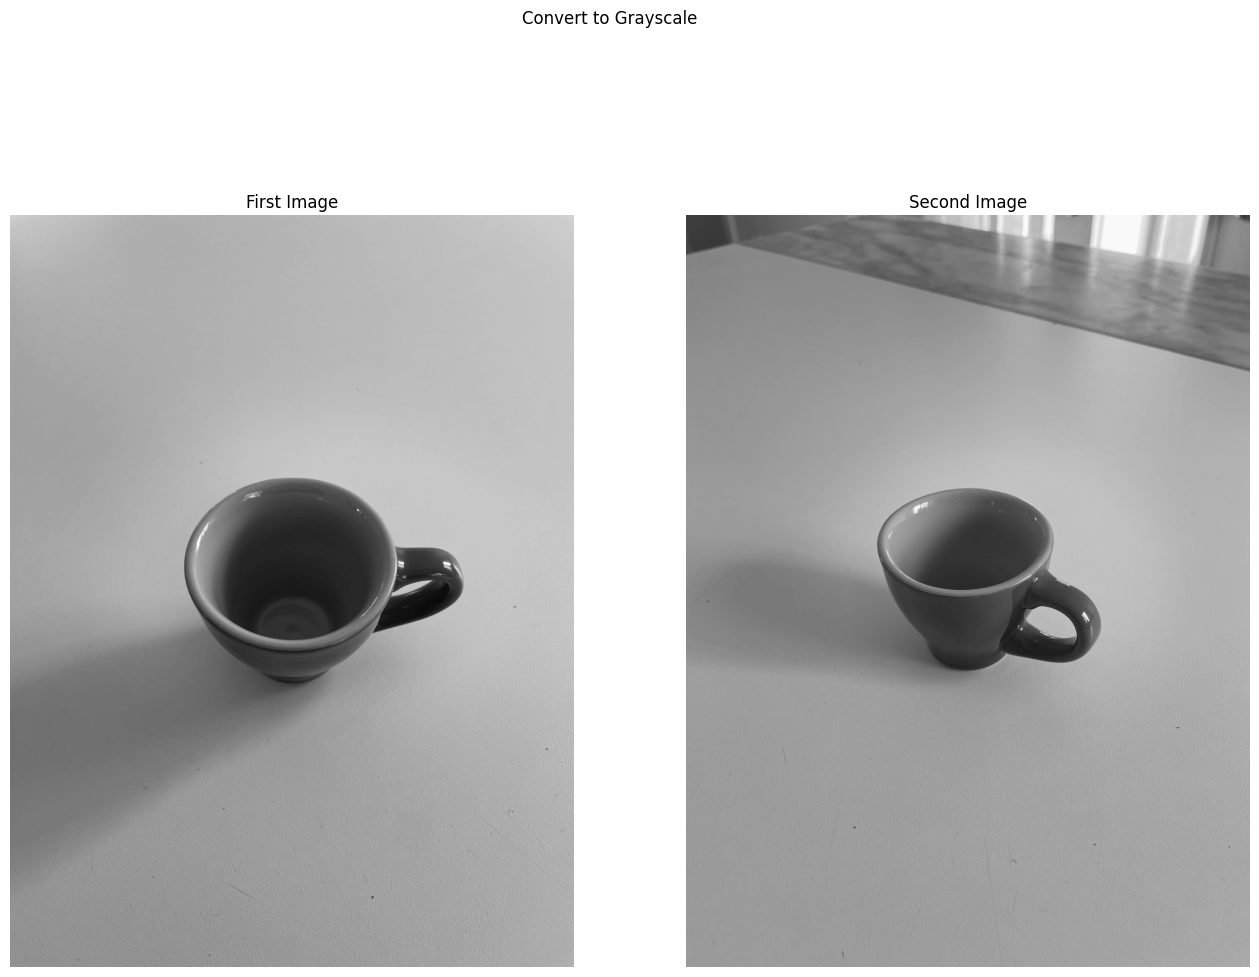

In [2]:
# converting to grayscale / computes the mean along the color channels
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB).mean(axis=2)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB).mean(axis=2)

# plot two images side by side
plt.figure(figsize=(16, 12))

# Plot the first image, (1 row, 2 columns, 1st subplot)
plt.subplot(1, 2, 1)
plt.imshow(gray_img1, cmap='gray')
plt.title("First Image")
plt.axis('off')

# Plot the second image, 1 row, 2 columns, 2nd subplot
plt.subplot(1, 2, 2)
plt.imshow(gray_img2, cmap='gray')
plt.title("Second Image")
plt.axis('off')

# Show the plot
plt.suptitle("Convert to Grayscale")
plt.show()

# 3 - Smooth the images using Gaussian smoothing
Smooth the pair of grayscale images using a 5x5 pixel Gaussian kernel. Then repeat the smoothing on the original grayscale images, this time using a 11x11 Gaussian kernel. Display the smoothed images in the notebook.

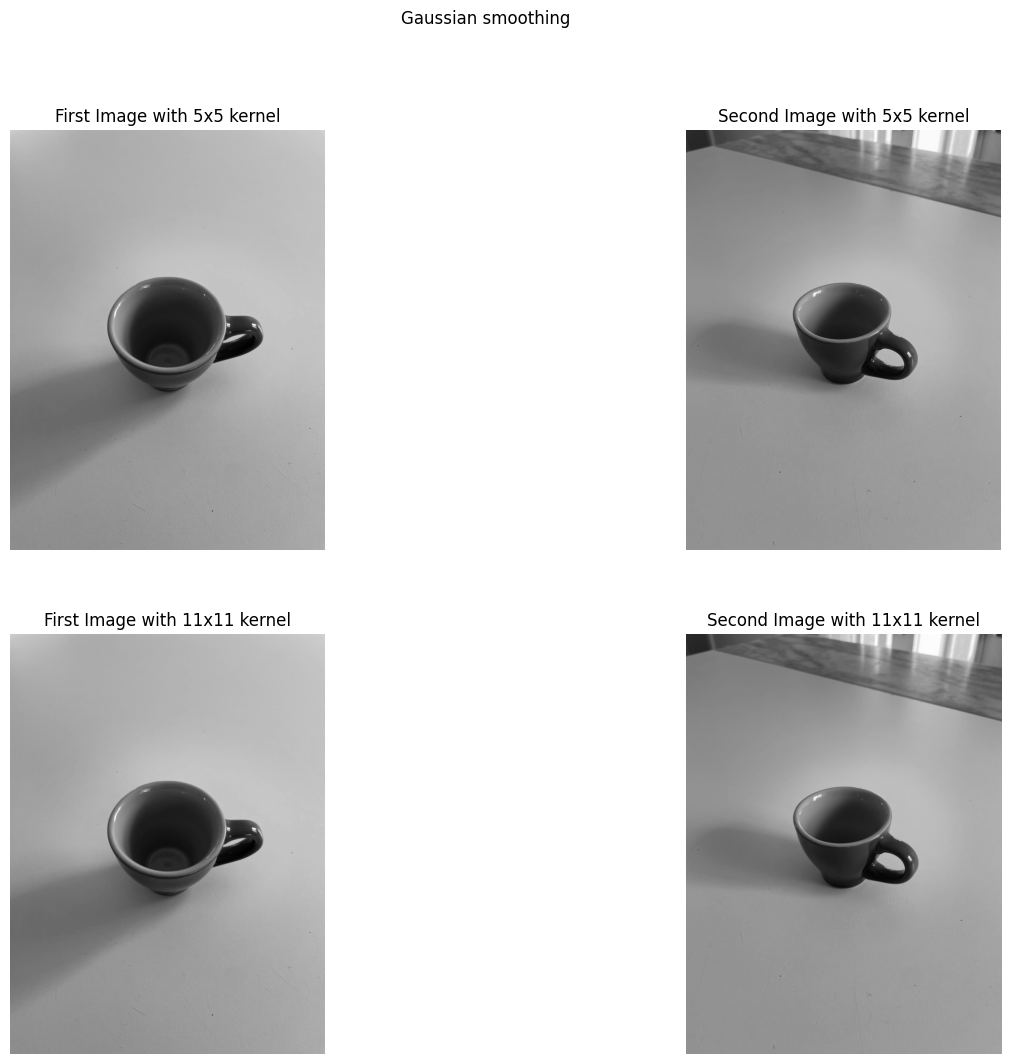

In [3]:
# https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html#:~:text=In%20this%20method%2C%20instead%20of,directions%2C%20sigmaX%20and%20sigmaY%20respectively.
# Creates gaussian kernel then applies low pass filter
# The third argument is sigmaX, the standard deviation in the X direction. Here, it's set to 0,
# which means OpenCV will calculate the standard deviation from the kernel size
smoothed_5x5_1 = cv2.GaussianBlur(gray_img1, (5, 5), 0)
smoothed_5x5_2 = cv2.GaussianBlur(gray_img2, (5, 5), 0)

smoothed_11x11_1 = cv2.GaussianBlur(gray_img1, (11, 11), 0)
smoothed_11x11_2 = cv2.GaussianBlur(gray_img2, (11, 11), 0)

# plot two images side by side
plt.figure(figsize=(16, 12))

# Plot the first image 5x5
plt.subplot(2, 2, 1)
plt.imshow(smoothed_5x5_1, cmap='gray')
plt.title("First Image with 5x5 kernel")
plt.axis('off')

# Plot the second image 5x5
plt.subplot(2, 2, 2)
plt.imshow(smoothed_5x5_2, cmap='gray')
plt.title("Second Image with 5x5 kernel")
plt.axis('off')

# Plot the first image 11x11
plt.subplot(2, 2, 3)
plt.imshow(smoothed_11x11_1, cmap='gray')
plt.title("First Image with 11x11 kernel")
plt.axis('off')

# Plot the second image 11x11
plt.subplot(2, 2, 4)
plt.imshow(smoothed_11x11_2, cmap='gray')
plt.title("Second Image with 11x11 kernel")
plt.axis('off')

# Show the plot
plt.suptitle("Gaussian smoothing")
plt.show()

# 4 - Compute Image Gradients
Compute the x and y derivative images of the smoothed images using the horizontal and vertical Sobel filters. Display the derivative images in the notebook.

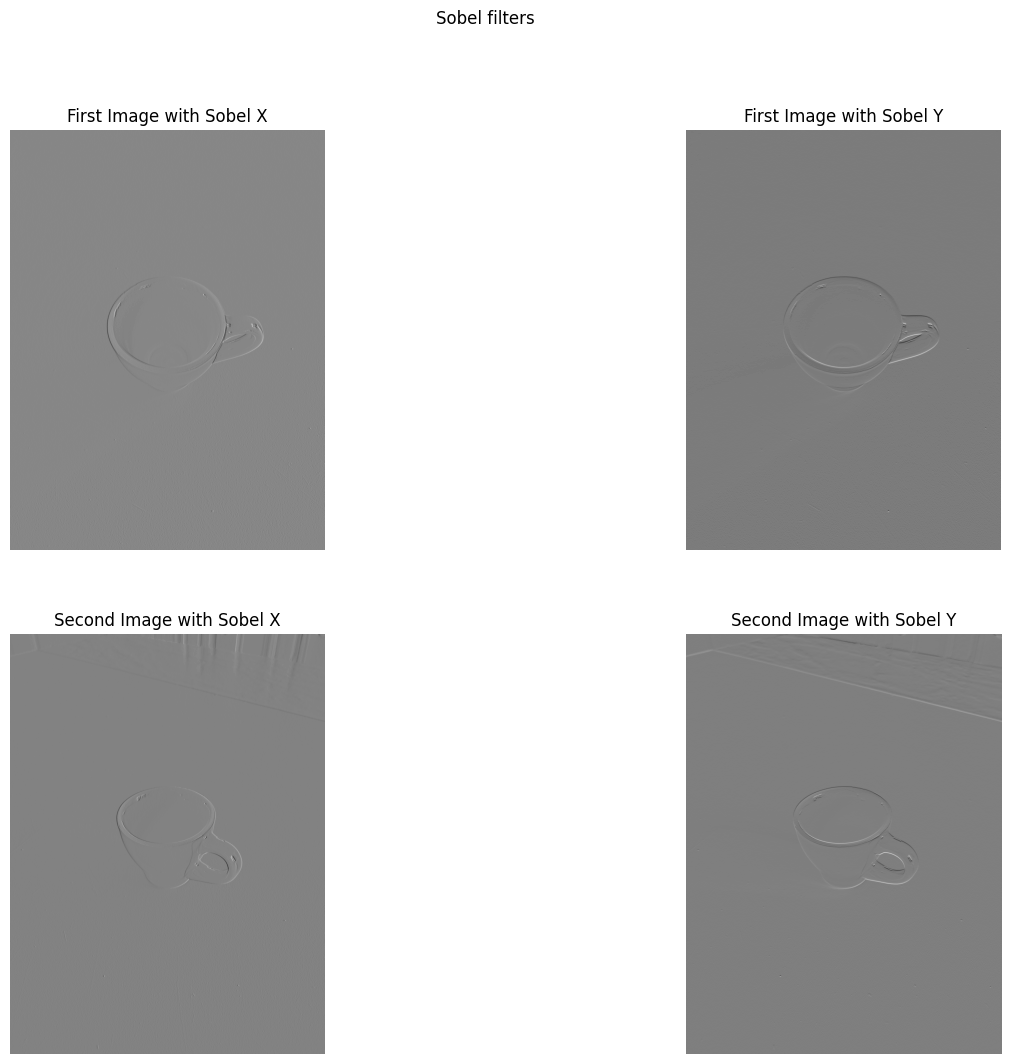

In [4]:
# https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html
# cv2.Sobel() computes the derivative of the image.
# Parameters:
# - smoothed_11x11_1: Input image, got better results with 11x11 smoothed kernel than 5x5
# - cv2.CV_64F: Depth of the destination image, set to 64-bit float (needed for magnitude/phase calculations).
# - 1, 0: Order of the derivative in X and Y directions. (1, 0) is for X direction, (0, 1) is for Y direction.
# - ksize = 3: Size of Sobel kernel, choose 3x3 since there is little noise, and want good edge localization.
# when tested with ksize = 5, too much deatil was picked up and backgroud was overdeatield, but the cup was outlined more clearly

# Apply Sobel filter in X direction for first image
sobelx_1 = cv2.Sobel(smoothed_11x11_1, cv2.CV_64F, 1, 0, ksize=3)
# Apply Sobel filter in Y direction for first image
sobely_1 = cv2.Sobel(smoothed_11x11_1, cv2.CV_64F, 0, 1, ksize=3)

# Apply Sobel filter in X direction for second image
sobelx_2 = cv2.Sobel(smoothed_11x11_2, cv2.CV_64F, 1, 0, ksize=3)
# Apply Sobel filter in Y direction for second image
sobely_2 = cv2.Sobel(smoothed_11x11_2, cv2.CV_64F, 0, 1, ksize=3)

# plot two images side by side
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.imshow(sobelx_1, cmap='gray')
plt.title("First Image with Sobel X")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobely_1, cmap='gray')
plt.title("First Image with Sobel Y")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sobelx_2, cmap='gray')
plt.title("Second Image with Sobel X")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sobely_2, cmap='gray')
plt.title("Second Image with Sobel Y")
plt.axis('off')

# Show the plot
plt.suptitle("Sobel filters")
plt.show()

# 5 - Compute the Edge Magnitude and Orientation
Compute the edge gradient magnitude and orientation of the smoothed images using the Sobel filter values. Display the magnitude and orientation images in the notebook. For the orientation image, display the angle value using an RGB colormap, such as ‘jet’ in the imshow() function (e.g. something like ax.imshow(data, cmap='jet') ).

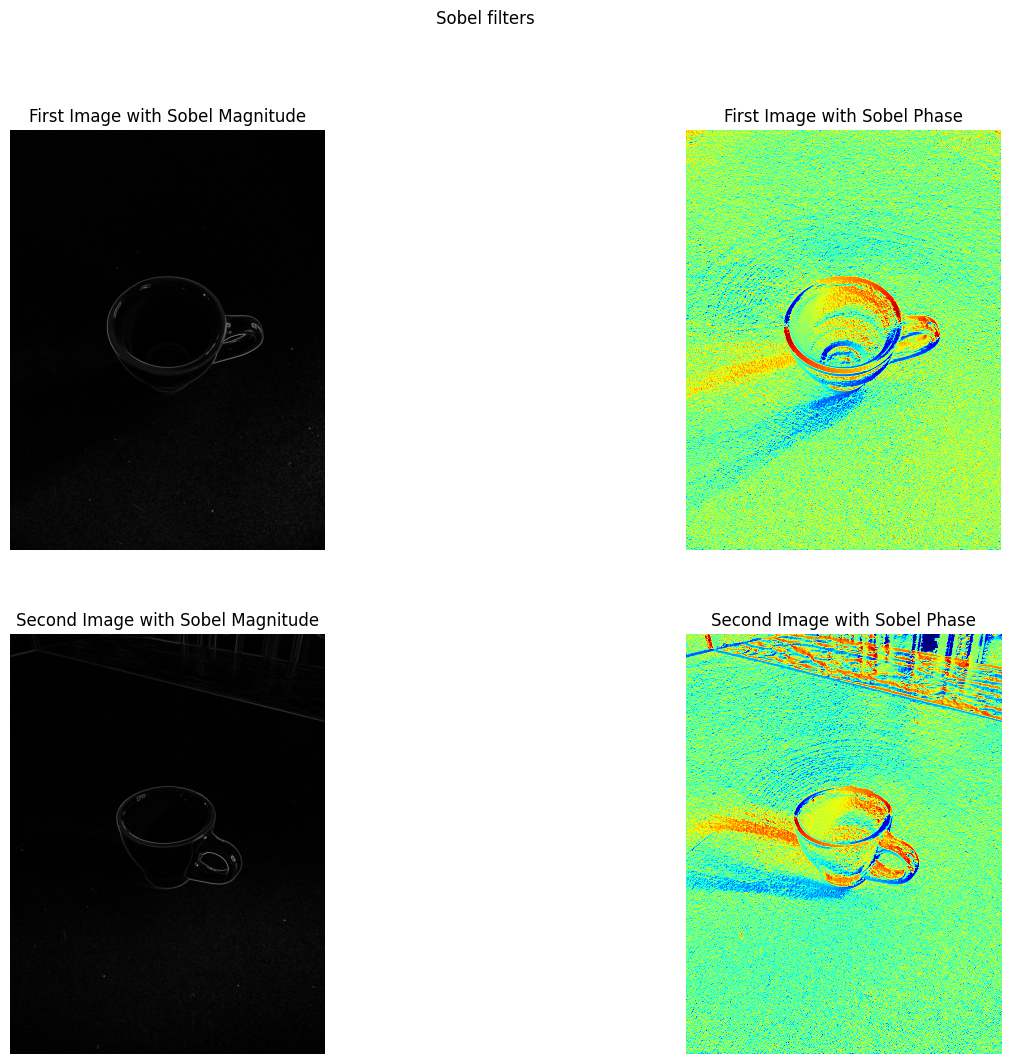

In [5]:
# Compute sobel Magnitude/Phase (from tutorial)
# The edge strength is given by the gradient magnitude ||f|| = sqrt(sobelx^2 + sobely^2)
# The gradient direction is given by pheta = tan^-1(sobely/sobelx)
I_m_1 = cv2.magnitude(sobelx_1, sobely_1)
I_p_1 = cv2.phase(sobelx_1, sobely_1)

I_m_2 = cv2.magnitude(sobelx_2, sobely_2)
I_p_2 = cv2.phase(sobelx_2, sobely_2)

# plot two images side by side
plt.figure(figsize=(16, 12))

# For the orientation image, display the angle value using an RGB colormap,
# such as ‘jet’ in the imshow() function (e.g. something like ax.imshow(data, cmap='jet') )
plt.subplot(2, 2, 1)
plt.imshow(I_m_1, cmap='gray')
plt.title("First Image with Sobel Magnitude")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(I_p_1, cmap='jet')
plt.title("First Image with Sobel Phase")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(I_m_2, cmap='gray')
plt.title("Second Image with Sobel Magnitude")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(I_p_2, cmap='jet')
plt.title("Second Image with Sobel Phase")
plt.axis('off')

# Show the plot
plt.suptitle("Sobel filters")
plt.show()

# 6 - Canny Edge Detection with opencv
Setup opencv in your colab or home computer environment (go to the Tutorial to learn how to do this). Use the Canny edge detector implementation in opencv to compute the Canny edge detector on your smoothed images.

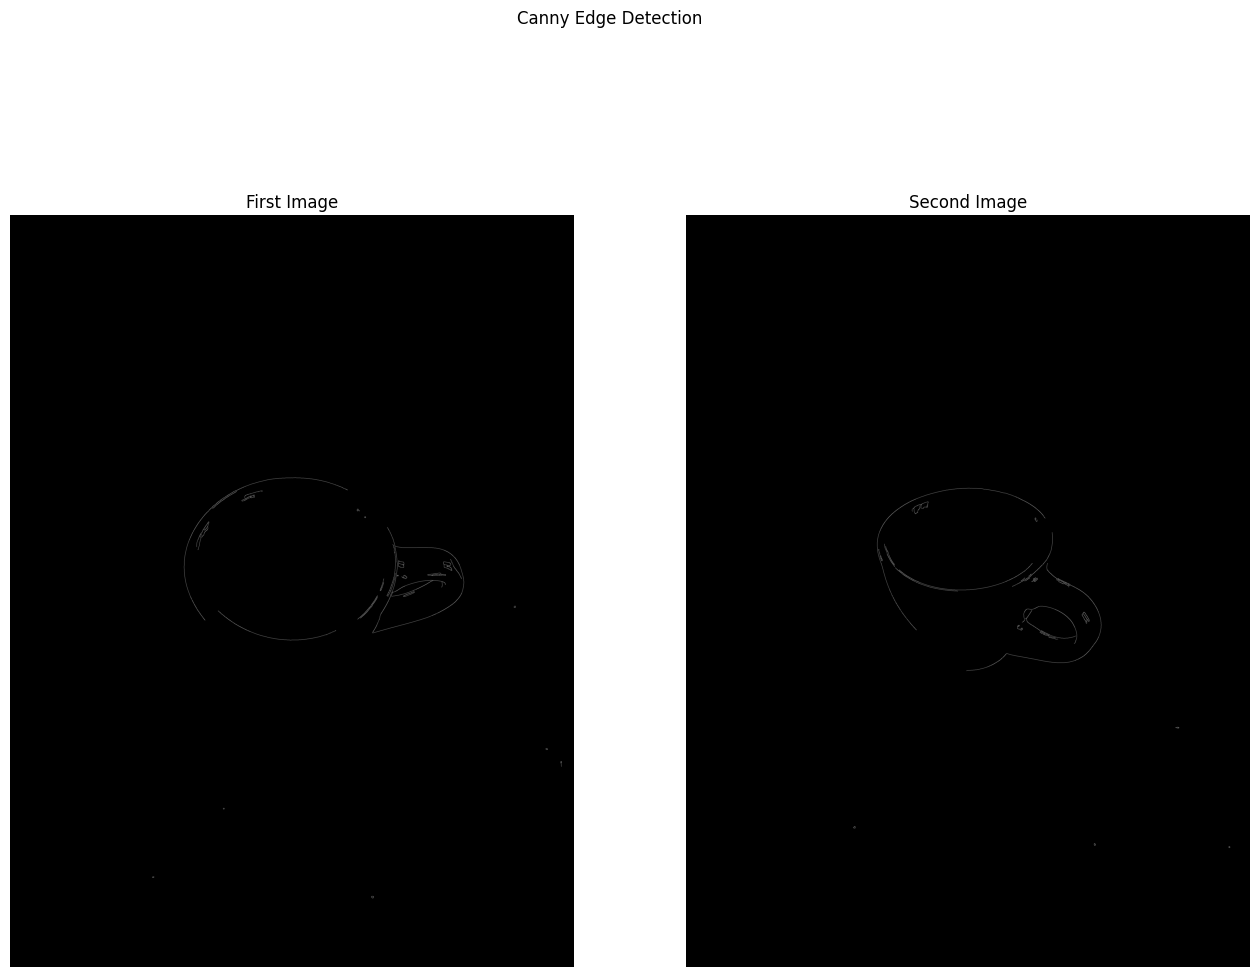

In [6]:
# Canny edge detector
# The cv2.Canny() function expects input images with the CV_8U data type.
# The np.uint8() function converts the input images to the required data type.
bit8_smoothed_1 = np.uint8(smoothed_11x11_1)
bit8_smoothed_2 = np.uint8(smoothed_11x11_2)

t_lower = 10        # Lower Threshold
t_upper = 120       # Upper threshold

# threshold is estimated... using same values as tutorial 3
canny_1 = cv2.Canny(bit8_smoothed_1, t_lower, t_upper)
canny_2 = cv2.Canny(bit8_smoothed_2, t_lower, t_upper)

# plot two images side by side
plt.figure(figsize=(16, 12))

plt.subplot(1, 2, 1)
plt.imshow(canny_1, cmap='gray')
plt.title("First Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(canny_2, cmap='gray')
plt.title("Second Image")
plt.axis('off')

# Show the plot
plt.suptitle("Canny Edge Detection")
plt.show()